# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [26]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path('sfo_neighborhoods_census_data.csv')
sfo_data = pd.read_csv(file_path, index_col='year')
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [10]:
# Calculate the mean number of housing units per year (hint: use groupby) 
yearly_housing_units = sfo_data.groupby(['year'])
#yearly_housing_units.head()
mean_housing_units = yearly_housing_units['housing_units'].mean()
mean_housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [11]:
# Save the dataframe as a csv file
mean_housing_units.to_csv('mean_housing_units.csv')

<AxesSubplot:title={'center':'Housing Units in San Francisco from 2010 to 2016'}, xlabel='Year', ylabel='Housing Units'>

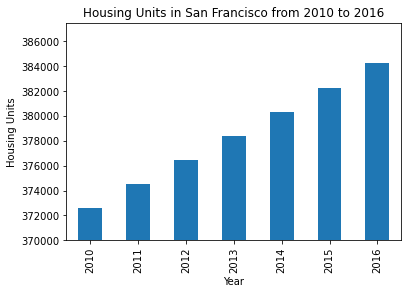

In [71]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
min_limit = 370000
max_limit = 387500

mean_housing_units.plot(
    kind='bar', 
    ylim = [min_limit, max_limit], 
    xlabel = 'Year', 
    ylabel = 'Housing Units', 
    title = 'Housing Units in San Francisco from 2010 to 2016'
    )

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [16]:
# Calculate the average sale price per square foot and average gross rent
average_prices_df = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby(['year']).mean()
average_prices_df 

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


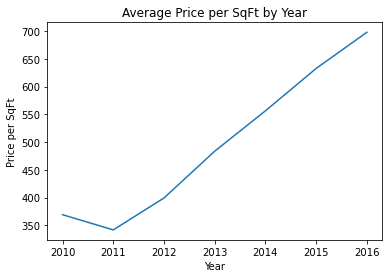

In [19]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
line_chart1 = average_prices_df['sale_price_sqr_foot'].plot(title='Average Price per SqFt by Year', xlabel='Year', ylabel='Price per SqFt')


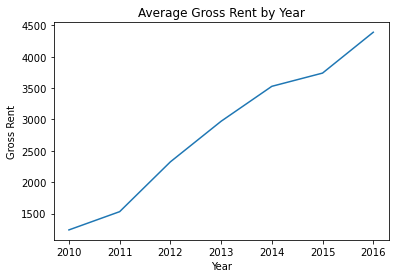

In [20]:
# Line chart for average montly rent
line_chart2 = average_prices_df['gross_rent'].plot(title='Average Gross Rent by Year', xlabel='Year', ylabel='Gross Rent')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [22]:
# Group by year and neighborhood and then create a new dataframe of the mean values
mean_sfo_data = sfo_data.groupby(['year', 'neighborhood']).mean('sale_price_sqr_foot')
mean_sfo_data

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

In [23]:
mean_sfo_data_df = pd.DataFrame(mean_sfo_data).reset_index()
mean_sfo_data_df

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [31]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
def neighborhood_selector_sqft(neighborhood):
    return mean_sfo_data_df.loc[mean_sfo_data_df['neighborhood']==neighborhood, :].hvplot.line(
        title='Average price per sq ft.',
        x='year',
        y='sale_price_sqr_foot'
    )

neighborhood_choice = mean_sfo_data_df['neighborhood']

interact(neighborhood_selector_sqft, neighborhood=neighborhood_choice)


BokehModel(combine_events=True, render_bundle={'docs_json': {'926d74ec-eec2-4bdc-922a-941f5a984721': {'defs': …

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02802')

In [30]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood

def neighborhood_selector_rent(neighborhood):
    return mean_sfo_data_df.loc[mean_sfo_data_df['neighborhood']==neighborhood, :].hvplot.line(
        title='Average price per sq ft.',
        x='year',
        y='gross_rent'
    )


interact(neighborhood_selector_rent, neighborhood=neighborhood_choice)

BokehModel(combine_events=True, render_bundle={'docs_json': {'a9832656-14e1-4aa2-a79f-0eba0d206dfc': {'defs': …

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02442')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [72]:
# Getting the data from the top 10 expensive neighborhoods to own
top_neighborhoods = sfo_data.groupby('neighborhood').mean().sort_values(by='sale_price_sqr_foot', ascending=False).head(10).reset_index()
top_neighborhoods

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [73]:
top_neighborhoods.hvplot.bar(
    title='Top 10 most expensive neighborhoods in SF',
    x='neighborhood',
    y='sale_price_sqr_foot',
    rot=90,
    height=500
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [38]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
mean_sfo_data_df

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [48]:
# Plotting the data from the top 10 expensive neighborhoods
mean_sfo_data_df.hvplot.bar(
    x='year',
    y=['gross_rent', 'sale_price_sqr_foot'],
    groupby='neighborhood',
    rot=60
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'a7e2e1f8-89ec-47c9-bf96-6326c0c52a8a': {'defs': …

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [51]:
# Load neighborhoods coordinates data
neighborhood_data = pd.read_csv('neighborhoods_coordinates.csv')
neighborhood_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [53]:
# Calculate the mean values for each neighborhood
neighborhood_values = sfo_data.groupby('neighborhood').mean().reset_index()
neighborhood_values

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.00,2817.285714
1,Anza Vista,373.382198,379050.00,3031.833333
2,Bayview,204.588623,376454.00,2318.400000
3,Bayview Heights,590.792839,382295.00,3739.000000
4,Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...,...
68,West Portal,498.488485,376940.75,2515.500000
69,Western Addition,307.562201,377427.50,2555.166667
70,Westwood Highlands,533.703935,376454.00,2250.500000
71,Westwood Park,687.087575,382295.00,3959.000000


In [54]:
# Join the average values with the neighborhood locations
hood_location_values = pd.concat([neighborhood_data, neighborhood_values], axis='columns', join='inner')
hood_location_values

,Neighborhood,Lat,Lon,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,Alamo Square,366.020712,378401.00,2817.285714
1,Anza Vista,37.779598,-122.443451,Anza Vista,373.382198,379050.00,3031.833333
2,Bayview,37.734670,-122.401060,Bayview,204.588623,376454.00,2318.400000
3,Bayview Heights,37.728740,-122.410980,Bayview Heights,590.792839,382295.00,3739.000000
4,Bernal Heights,37.728630,-122.443050,Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...,...,...,...,...
68,West Portal,37.740260,-122.463880,West Portal,498.488485,376940.75,2515.500000
69,Western Addition,37.792980,-122.435790,Western Addition,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.734700,-122.456854,Westwood Highlands,533.703935,376454.00,2250.500000
71,Westwood Park,37.734150,-122.457000,Westwood Park,687.087575,382295.00,3959.000000


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [74]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
px.scatter_mapbox(
    hood_location_values,
    title='Average Sale Price Per Square Foot and Gross Rent in San Francisco',
    lat='Lat',
    lon='Lon',
    size='sale_price_sqr_foot',
    color='gross_rent'
)

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [59]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = mean_sfo_data_df[mean_sfo_data_df["neighborhood"].isin(top_neighborhoods["neighborhood"].head(10))]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [62]:
# Parallel Categories Plot
px.parallel_categories(
    top_neighborhoods,
    title='Parallel Categories Analysis of Most Expensive San Francisco Neighborhoods',
    dimensions=['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'],
    color='sale_price_sqr_foot'
)

In [63]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    top_neighborhoods,
    title='Parallel Coordinates Analysis of Most Expensive San Francisco Neighborhoods',
    color='sale_price_sqr_foot'
)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [68]:
px.sunburst(
    df_expensive_neighborhoods_per_year,
    title='Cost Analysis of Most Expensive Neighborhoods in San Francisco per Year',
    path=['year', 'neighborhood'],
    values='sale_price_sqr_foot',
    color='gross_rent',
    color_continuous_scale='thermal'
)